# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop
import numpy as np
import scipy.stats.distributions as dist

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [3]:
# parparing the data and drop any missing values

da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
dx = da[["SMQ020x", "RIDAGEYR", "RIAGENDRx"]].dropna()


# making small views one for females and one for males 
# make the columns countable by converting it 1 and 0

dx_females = dx.loc[dx.RIAGENDRx=="Female", "SMQ020x"].replace({"Yes": 1, "No": 0})
dx_males = dx.loc[dx.RIAGENDRx=="Male", "SMQ020x"].replace({"Yes": 1, "No": 0})


# then applaying satats model to calculate the t-test and p-value

sm.stats.ttest_ind(dx_females, dx_males) # prints test statistic, p-value, degrees of freedom

(-16.420585558984445, 3.0320887866906843e-59, 5723.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

what we have here p_value = 3.032e-58 ,
what if the differece between males and females = zero (meaning thier is no differece)
and we get this portions of males and females that smoking before like this in our sample
the probablity is extermly low = 3.032e-58   (p-value)
which mean that we can say that  according to this probability that the differece between them
is not zero

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

### Using Stats module

In [4]:
# 95% CI for the proportion of females who smoke  
sm.stats.proportion_confint( sum(dx_females), len(dx_females))  

(0.2882949879861214, 0.32139545615923526)

In [5]:
# 95% CI for the proportion of Males who smoke 
sm.stats.proportion_confint( sum(dx_males), len(dx_males))

(0.49458749263718593, 0.5319290347874418)

In [6]:
smprop.confint_proportions_2indep( sum(dx_females), len(dx_females), sum(dx_males), len(dx_males), compare='diff', alpha=0.05, correction=True)

(-0.23316728428702627, -0.18329691308756202)

__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

there is no differece they both confirm the difference between them is not Zero 
but Confidence interval add more support and quantify the decision  

### Using Numpy module 

In [7]:
# insert your code here
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [8]:
# CI for females
p = .304845 
lcb = p - 1.96 * se_female
ucb = p + 1.96 * se_female
(lcb, ucb)

(0.2882944651781637, 0.32139553482183625)

In [9]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [10]:
# CI for Males
p = .513258 
lcb = p - 1.96 * se_male
ucb = p + 1.96 * se_male
(lcb, ucb)

(0.49458688557746244, 0.5319291144225375)

In [11]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

In [12]:
d = .304845 - .513258
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.23336356545788706, -0.18346243454211297)

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [13]:
# perpar the data 
# 5 means graduated

da.DMDEDUC2.value_counts()
da['grad'] = da['DMDEDUC2'].replace({5: "Yes", 4: "No", 3: "No", 1: "No",2: "No",9: "No"})
dx = da[["grad", "BMXHT"]].dropna()


# making two views for out data 
dx_grad = dx.loc[dx.grad == 'Yes',"BMXHT"]
dx_not_grad =dx.loc[dx.grad == 'No',"BMXHT"]

# calculating the difference between the height in two groups 
cm_test = sm.stats.ztest(dx_grad,dx_not_grad)

# convert to inches & made the test 
dx_grad_inch = dx_grad * 0.393701
dx_not_grad_inch = dx_not_grad * 0.393701

inch_test = sm.stats.ztest(dx_grad_inch,dx_not_grad_inch)
(cm_test,inch_test)

((7.578706943765076, 3.4901585776605263e-14),
 (7.578706943765011, 3.490158577662278e-14))

__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

yes

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

it's basically the same 

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [14]:
# insert your code here
dx = da[["RIDAGEYR", "RIAGENDRx","BMXBMI"]].dropna()
dx = dx.loc[dx.RIAGENDRx == "Male"]

male34 = dx.loc[(dx.RIDAGEYR >= 30) & (dx.RIDAGEYR <= 40 ), ['BMXBMI']]
male56 = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60 ), ['BMXBMI']]


normal_data = sm.stats.ztest(male34.BMXBMI, male56.BMXBMI)

# log data calculation 
male34_log = np.log(male34.BMXBMI)
male56_log = np.log(male56.BMXBMI)

log_data = sm.stats.ztest(male34_log, male56_log)

(normal_data,log_data)

((0.8984008016755222, 0.36897190924214873),
 (0.7057844184100666, 0.4803222133688403))

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

these tests indicates that their is no difference between them,
mean while the difference between the normal_data and log_data 
refers to that log data is transformed to be more normal than the raw data 

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

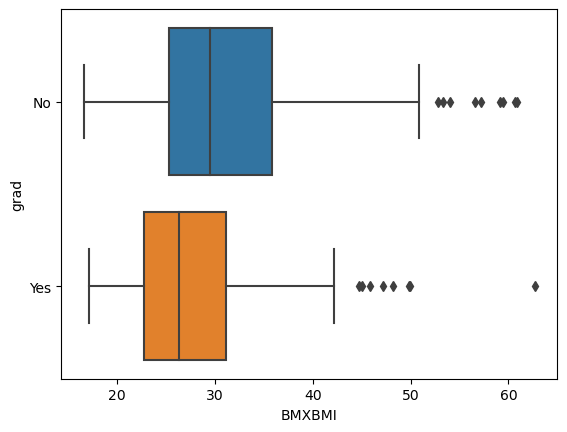

In [27]:
# prepar the data first 

da.DMDEDUC2.value_counts()
da['grad'] = da['DMDEDUC2'].replace({5: "Yes", 4: "No", 3: "No", 1: "No",2: "No",9: "No"})
dx = da[["grad", "BMXBMI","RIDAGEYR", "RIAGENDRx"]].dropna()
dx = dx.loc[ (dx.RIAGENDRx == 'Female') & (dx.RIDAGEYR >= 30) & (dx.RIDAGEYR <= 40),:]


# making two views for out data 
dx_grad = dx.loc[dx.grad == 'Yes',"BMXBMI"]
dx_not_grad =dx.loc[dx.grad == 'No',"BMXBMI"]

sns.boxplot(x= dx.BMXBMI , y = dx.grad);
# from this graph we can see that the variance is different in them
# with not_grad has bigger variance than grad ones

In [29]:
# we use weighted stats to counter any sampling errors
dx_grad = sm.stats.DescrStatsW(dx_grad)
dx_not_grad = sm.stats.DescrStatsW(dx_not_grad)

print("pooled: ", sm.stats.CompareMeans(dx_grad, dx_not_grad).ztest_ind(usevar='pooled'))
print("unequal:", sm.stats.CompareMeans(dx_grad, dx_not_grad).ztest_ind(usevar='unequal'))

pooled:  (-4.643908450956429, 3.4187910067116e-06)
unequal: (-4.833662355599106, 1.3404386169203498e-06)


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

both has evidence against null hypothesis but pooled approach give greater value than unpooled 
so, the pooled approach give stronger evidence

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

In our case, the results would be the same because the difference in variance is very clear. However, what happens when the pooled approach gives stronger evidence than it should, which in other cases could lead us to a wrong conclusion?

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [33]:
# insert your code here
dx = da[["RIAGENDRx", "BPXSY1", "BPXSY2", "RIDAGEYR"]].dropna()
dx["agegrp"] = pd.cut(dx.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
for k, g in dx.groupby(["RIAGENDRx", "agegrp"]):
    db = g.BPXSY1 - g.BPXSY2
    # print stratum definition, mean difference, sample size, test statistic, p-value
    print(k, db.mean(), db.size, sm.stats.ztest(db.values, value=0))

('Female', Interval(18, 30, closed='right')) 0.13708260105448156 569 (0.7612107360791227, 0.4465312067051751)
('Female', Interval(30, 40, closed='right')) 0.6713615023474179 426 (3.307398751951031, 0.0009416674523368051)
('Female', Interval(40, 50, closed='right')) 0.5970149253731343 469 (2.6040611621024654, 0.009212631487347644)
('Female', Interval(50, 60, closed='right')) 0.7685393258426966 445 (3.1023718750881724, 0.001919766301204196)
('Female', Interval(60, 70, closed='right')) 0.8787878787878788 396 (3.1024528501809625, 0.0019192411825181255)
('Female', Interval(70, 80, closed='right')) 1.4512820512820512 390 (5.141706875154317, 2.722536503552981e-07)
('Male', Interval(18, 30, closed='right')) 0.00390625 512 (0.01959622841647691, 0.9843654725443948)
('Male', Interval(30, 40, closed='right')) 0.46296296296296297 432 (1.9451535788714596, 0.05175649697939119)
('Male', Interval(40, 50, closed='right')) 0.17894736842105263 380 (0.7201800810138878, 0.47141412641258706)
('Male', Interva

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

what we need to focus on  the last number (p-value)
this tells us that probability of there is no difference between first and sconde blood prusur 
if this number is smaller than .05 this mean that their is a difference 
if it larger this means that there is no differece and the two measures have the same mean 

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [34]:
# insert your code here
for k, g in dx.groupby(["RIAGENDRx", "agegrp"]):
    # print stratum definition, mean difference, sample size, test statistic, p-value
    print(k, db.mean(), db.size, sm.stats.ztest(g.BPXSY1, g.BPXSY2))

('Female', Interval(18, 30, closed='right')) 2.031413612565445 382 (0.2245595858432537, 0.8223219077107284)
('Female', Interval(30, 40, closed='right')) 2.031413612565445 382 (0.7853606442611086, 0.4322421486065686)
('Female', Interval(40, 50, closed='right')) 2.031413612565445 382 (0.5974624218575985, 0.5501986887148249)
('Female', Interval(50, 60, closed='right')) 2.031413612565445 382 (0.6276096027348104, 0.5302597164985068)
('Female', Interval(60, 70, closed='right')) 2.031413612565445 382 (0.6717065488481436, 0.5017705314230756)
('Female', Interval(70, 80, closed='right')) 2.031413612565445 382 (0.9697324474707487, 0.3321798724101044)
('Male', Interval(18, 30, closed='right')) 2.031413612565445 382 (0.005918509505686175, 0.9952777402116108)
('Male', Interval(30, 40, closed='right')) 2.031413612565445 382 (0.5095244732590083, 0.6103846484936849)
('Male', Interval(40, 50, closed='right')) 2.031413612565445 382 (0.1492905600661382, 0.8813243637759886)
('Male', Interval(50, 60, closed

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

if we consire them as different groups we will conclude that their is no difference between 
two groups meanwhile if we calculte it as they are the same group we conclude that 
their is a differece between them! 